In [9]:
import matplotlib.pyplot as plt
import numpy as np
import time as t
import math
from decimal import *
from prettytable import PrettyTable

In [126]:
def fib_recursive(n: int) -> int:
  """Recursive subroutine for positive Fibonacci numbers."""

  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fib_recursive(n-1) + fib_recursive(n-2)

In [127]:
def fib_recursive_neg(n: int) -> int:
  """Recursive subroutine for negative Fibonacci numbers."""

  assert n < 0
  if abs(n) % 2:
    return fib_recursive(abs(n))
  else:
    return -fib_recursive(abs(n))

In [128]:
def fib1(n: int) -> int:
  """
  Reccursive algorithm for generating n-th Fibonacci term.
  Adapted for negative n as well.
  """
  
  if n < 0:
    return fib_recursive_neg(n)
  else:
    return fib_recursive(n)

In [129]:
# make data
arr = [n for n in range(0, 41, 2)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib1(n)
  end = t.time()
  print(end-start)
  ellapsed_time.append(end-start)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001005411148071289
0.00099945068359375
0.001996755599975586
0.007048130035400391
0.017999649047851562
0.0449984073638916
0.1139516830444336
0.2993204593658447
0.7780797481536865
2.0206077098846436
5.327888488769531
13.859094619750977
36.39543414115906


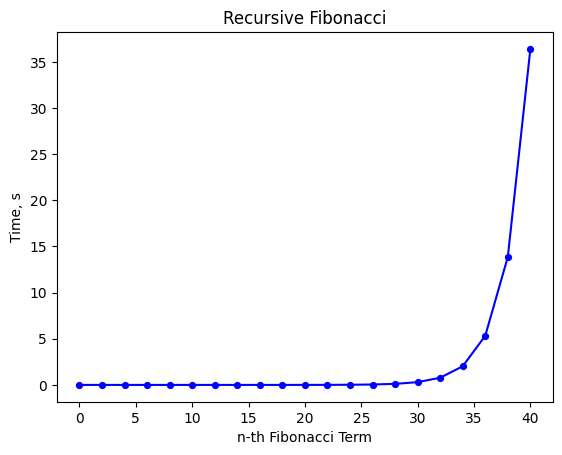

In [130]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("Recursive Fibonacci")

plt.show()

In [131]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 3) for x in ellapsed_time])
table

n,0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40
"Time, s",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.002,0.007,0.018,0.045,0.114,0.299,0.778,2.021,5.328,13.859,36.395


In [132]:
def fib2(n: int) -> int:
  """
  Memoized dynamic-programming algorithm for computing n-th term of Fibonacci sequence.
  """
  memo = [0, 1]
  for i in range(2, n+1):
    memo.append(memo[i-1] + memo[i-2])
  return memo[n]


In [133]:
print(fib2(7))

13


In [394]:
# make data
arr = [n for n in range(0, 12001, 1000)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib2(n)
  end = t.time()
  ellapsed_time.append(end-start)

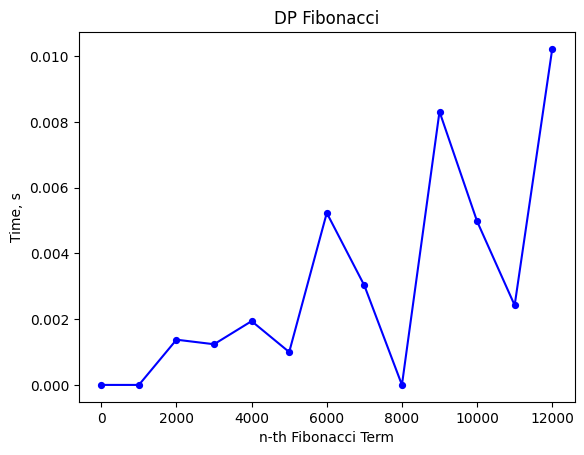

In [395]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("DP Fibonacci")

plt.show()

In [396]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 6) for x in ellapsed_time])
table

n,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000
"Time, s",0.0,0.0,0.001375,0.001237,0.00194,0.000999,0.005229,0.003023,0.0,0.008311,0.004975,0.002422,0.010216


In [424]:
def fib3(n: int) -> int:
  """Returns n-th term of Fibonacci sequence using Binet formula."""

  ctx = Context(prec=101, rounding=ROUND_CEILING)
  term1 = ctx.power(
    ctx.divide(
      Decimal(1) + Decimal(5).sqrt(), Decimal(2)
    ), 
      Decimal(n)
  )
  term2 = ctx.power(
    ctx.divide(
      Decimal(1) - Decimal(5).sqrt(), Decimal(2)
    ), 
    Decimal(n)
  )

  return round(ctx.divide(ctx.subtract(term1, term2), Decimal(5).sqrt()))

In [435]:
fib3(110)

43566776258854844738105

In [276]:
# make data
arr = [n for n in range(0, 12001, 1000)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib3(n)
  end = t.time()
  ellapsed_time.append(end-start)

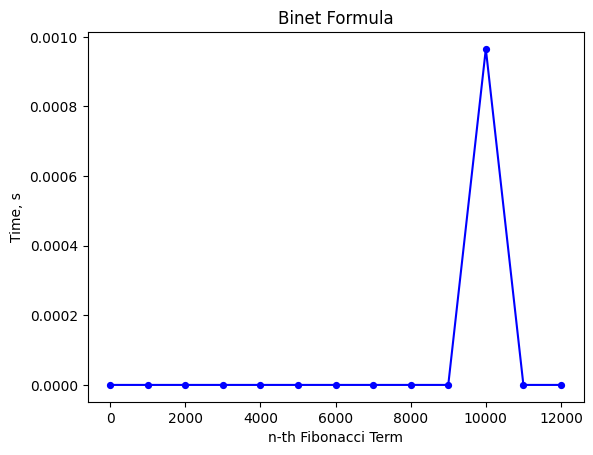

In [277]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("Binet Formula")

plt.show()

In [278]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 6) for x in ellapsed_time])
table

n,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000
"Time, s",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000965,0.0,0.0


In [3]:
def mult_mtrx(A, B):
  """Returns product of two 2x2 matrices A and B."""
  
  M = [[0, 0], [0, 0]]
  M[0][0] = A[0][0] * B[0][0] + A[0][1] * B[1][0]
  M[0][1] = A[0][0] * B[0][1] + A[0][1] * B[1][1]
  M[1][0] = A[1][0] * B[0][0] + A[1][1] * B[1][0]
  M[1][1] = A[1][0] * B[0][1] + A[1][1] * B[1][1]
  return M

In [4]:
def pow_mtrx(M, n: int):
  """Returns n-th power of 2x2 matrix M."""
  
  A = [[1, 0], [0, 1]]
  if n == 0:
    return A
  for i in range(n):
    A = mult_mtrx(M, A)
  return A

In [296]:
pow_mtrx([[1, 1], [1, 0]], 2)

[[2, 1], [1, 1]]

In [297]:
def fib4(n: int) -> int:
  """Algorithm for computing n-th term of Fibonacci sequence using Matrix Power Method."""
  
  F = [[1, 1], [1, 0]]
  if n == 0:
    return 0
  else:
    return pow_mtrx(F, n-1)[0][0]

In [304]:
for i in range(10):
  print(fib4(i))

0
1
1
2
3
5
8
13
21
34


In [306]:
# make data
arr = [n for n in range(0, 12001, 1000)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib4(n)
  end = t.time()
  ellapsed_time.append(end-start)

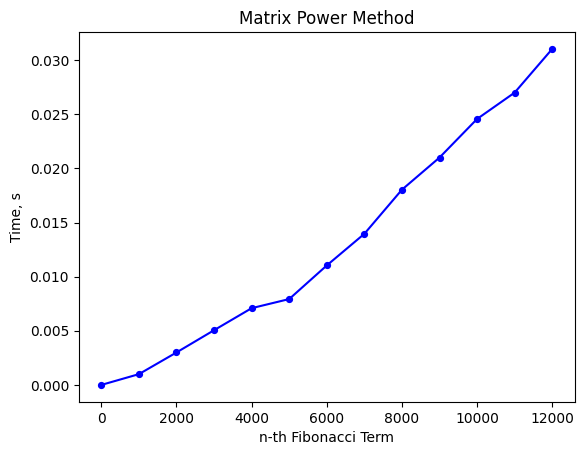

In [308]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("Matrix Power Method")

plt.show()

In [309]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 6) for x in ellapsed_time])
table

n,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000
"Time, s",0.0,0.000995,0.002998,0.005053,0.007089,0.007931,0.011035,0.013957,0.018032,0.021,0.024564,0.027001,0.031034


In [406]:
def fib5_recursive(n: int, F: list) -> int:
  """
  Recursive subroutine for computing n-th Fibonacci number. Uses recursive formula
  for F_2k and F_2k+1 (even/odd) terms.
  """

  if n == 0:
    F[n] = 0
  elif n in [1, 2]:
    F[n] = 1
  else:
    k = n // 2
    f1 = fib5_recursive(k, F)
    f2 = fib5_recursive(k + 1, F)
    if n % 2 == 0:
      F[n] = 2 * f1 * f2 - f1 * f1
    else:
      F[n] = f2 * f2 + f1 * f1
  return F[n]

def fib5(n: int) -> int:
  """
  Algorithm for computing n-th Fibonacci term using another 
  recursive formula for odd/even terms.
  """

  F = [0] * (n + 1)
  return fib5_recursive(n, F)


In [407]:
def fib5(n: int) -> int:
  """
  Algorithm for computing n-th Fibonacci term using another 
  recursive formula for odd/even terms.
  """

  F = [0] * (n + 1)
  return fib5_recursive(n, F)

In [408]:
for i in range(10):
  print(fib5(i))

0
1
1
2
3
5
8
13
21
34


In [409]:
# make data
arr = [n for n in range(0, 12001, 1000)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib5(n)
  end = t.time()
  ellapsed_time.append(end-start)

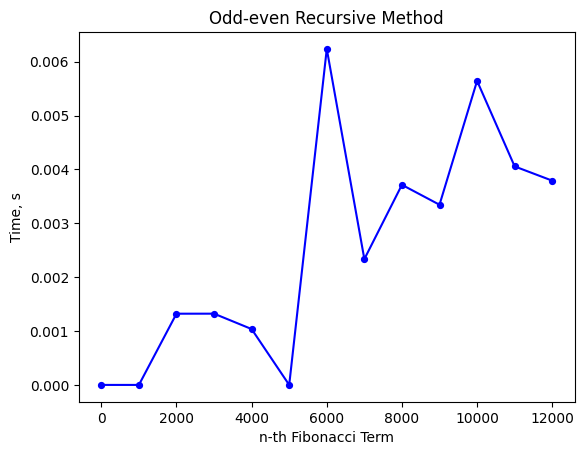

In [410]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, linewidth=1.5, color="blue", marker="o", markersize=4.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("Odd-even Recursive Method")

plt.show()

In [411]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 6) for x in ellapsed_time])
table

n,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000
"Time, s",0.0,0.0,0.001322,0.001323,0.001037,0.0,0.006237,0.002336,0.003714,0.003345,0.005644,0.004056,0.003791


In [1]:
def pow_mtrx_eff(M, n: int):
  """
  Multiplication of matrices using reapeated square method.
  """
  
  A = [[1, 0], [0, 1]]
  if n == 0:
    return A
  elif n % 2 == 0:
    return pow_mtrx_eff(mult_mtrx(M, M), n // 2)
  else:
    return mult_mtrx(
      M,
      pow_mtrx_eff(mult_mtrx(M, M), (n-1) // 2)
    )

In [5]:
A = [[1, 1], [1, 0]]
print(pow_mtrx_eff(A, 6))

[[13, 8], [8, 5]]


In [6]:
def fib6(n: int) -> int:
  """
  Repeated Squares Method for computing n-th term of Fibonacci sequence.
  For base algorithm is used Matrix Power approach.
  """

  M = [[1, 1], [1, 0]]
  if n == 0:
    return 0
  else:
    return pow_mtrx_eff(M, n-1)[0][0]

In [7]:
print(fib3(124))
print(fib6(124))

NameError: name 'fib3' is not defined

In [10]:
# make data
arr = [n for n in range(0, 1200001, 1000)]
ellapsed_time = []
for n in arr:
  start = t.time()
  fib6(n)
  end = t.time()
  ellapsed_time.append(end-start)

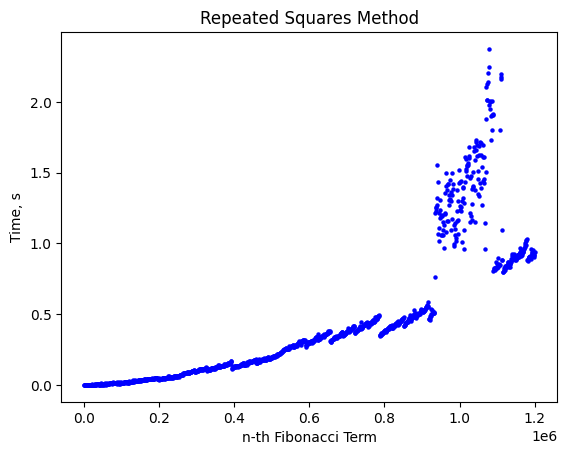

In [13]:
# plot
fig, ax = plt.subplots()

ax.plot(arr, ellapsed_time, "o", color="blue", markersize=2.2)
ax.set_xlabel("n-th Fibonacci Term")
ax.set_ylabel("Time, s")
ax.set_title("Repeated Squares Method")

plt.show()

In [404]:
table = PrettyTable()
table.field_names = ["n"] + arr
table.add_row(["Time, s"] + [round(x, 10) for x in ellapsed_time])
table

n,0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000
"Time, s",0.0,0.0010354519,0.0,0.0,0.0,0.0,0.0,0.0010015965,0.0,0.0,0.0,0.0,0.0
